
Load data.

In [25]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import random
import seaborn as sns

random.seed(42)

DATA_FILE = 'ML_train.csv'
TARGET = 'Fault type'
ENCODED_TARGET = 'Encoded fault type'
MODEL_NAME = 'PyOD KNN'

train_df = pd.read_csv(DATA_FILE)

Get x and y.

In [26]:
from sklearn.model_selection import train_test_split

x = train_df.drop([TARGET], axis=1)
x = x.drop([ENCODED_TARGET], axis=1)
y = train_df[TARGET]

# convert y to binary
y = y.apply(lambda x: 0 if x == 'Time_Normal' else 1)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42, stratify=y)


Initialize a kNN anomaly detector from PyOD, fit the model and make a prediction.

https://github.com/yzhao062/pyod

In [27]:
from pyod.models.knn import KNN

clf = KNN()
clf.fit(x_train)

y_train_pred = clf.labels_  # binary labels (0: inliers, 1: outliers)
y_train_scores = clf.decision_scores_  # raw outlier scores

# get the prediction on the test data
y_test_pred = clf.predict(x_test)  # returns outlier labels (0 or 1)
y_test_scores = clf.decision_function(x_test)  # return outlier scores

Evaluate prediction by ROC and Precision scores.


Training data:
PyOD KNN ROC:0.7106, precision @ rank n:0.9099

Test data:
PyOD KNN ROC:0.751, precision @ rank n:0.914


<Figure size 600x500 with 0 Axes>

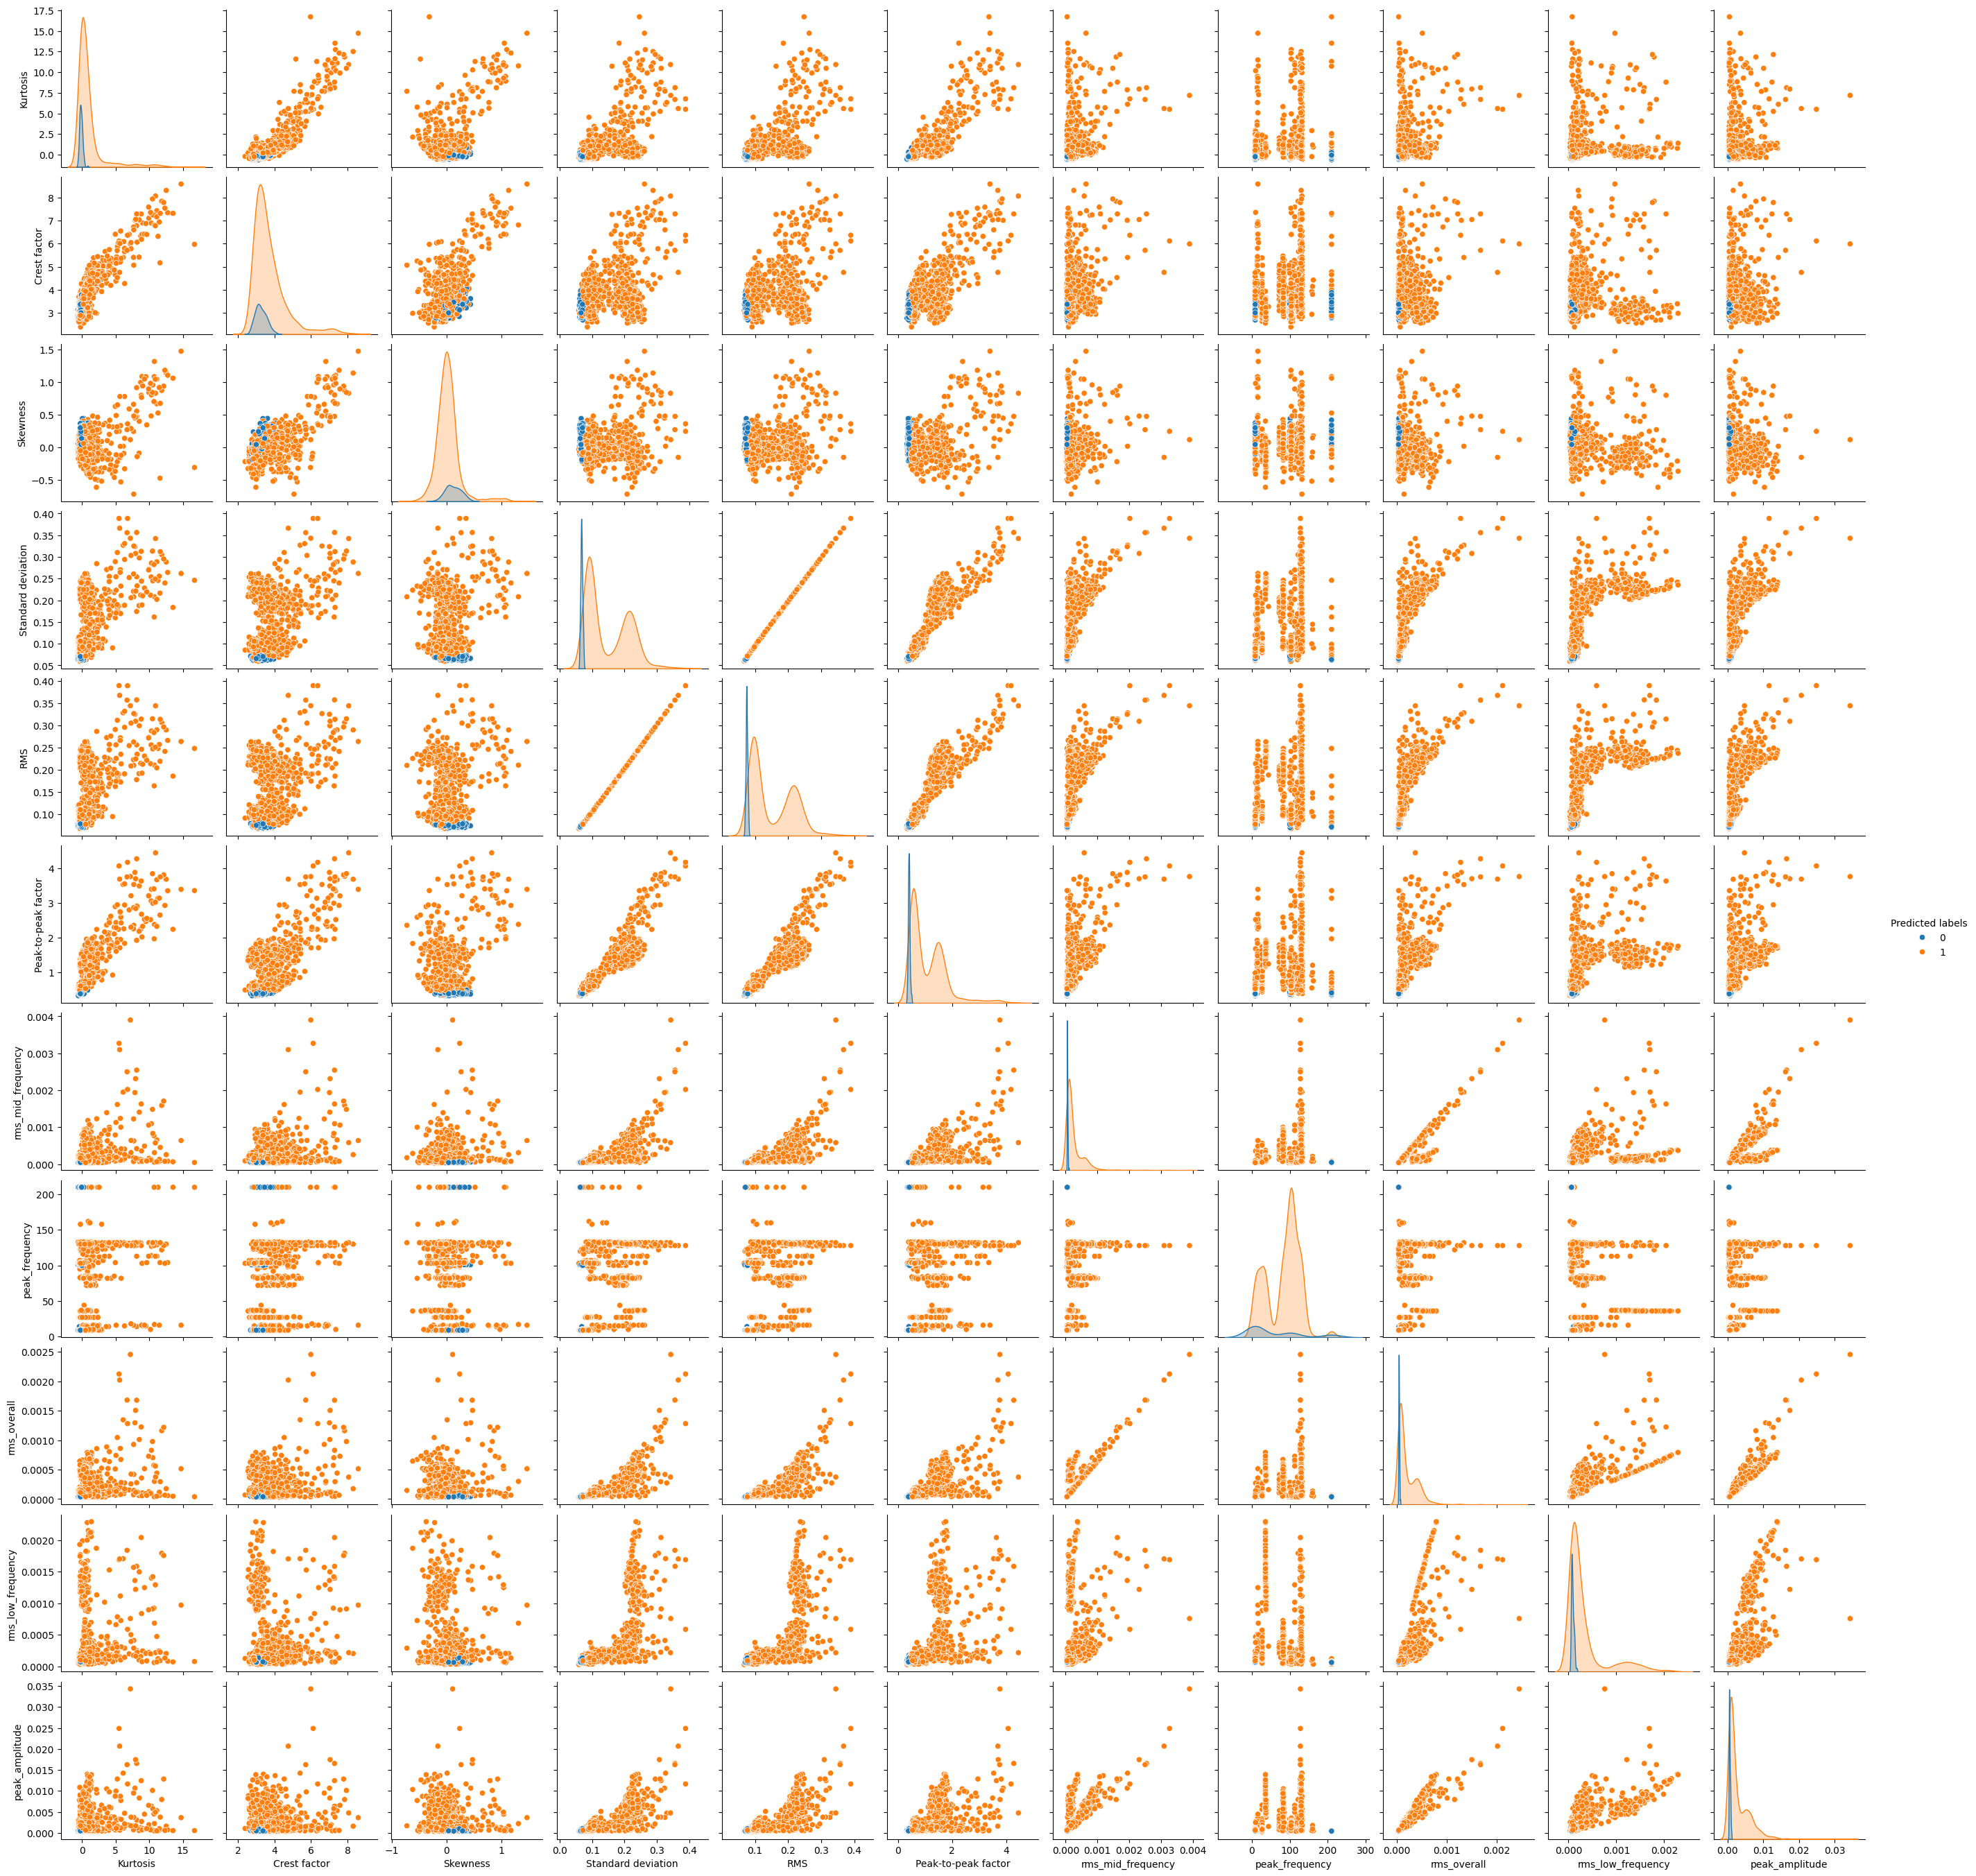

<Figure size 600x500 with 0 Axes>

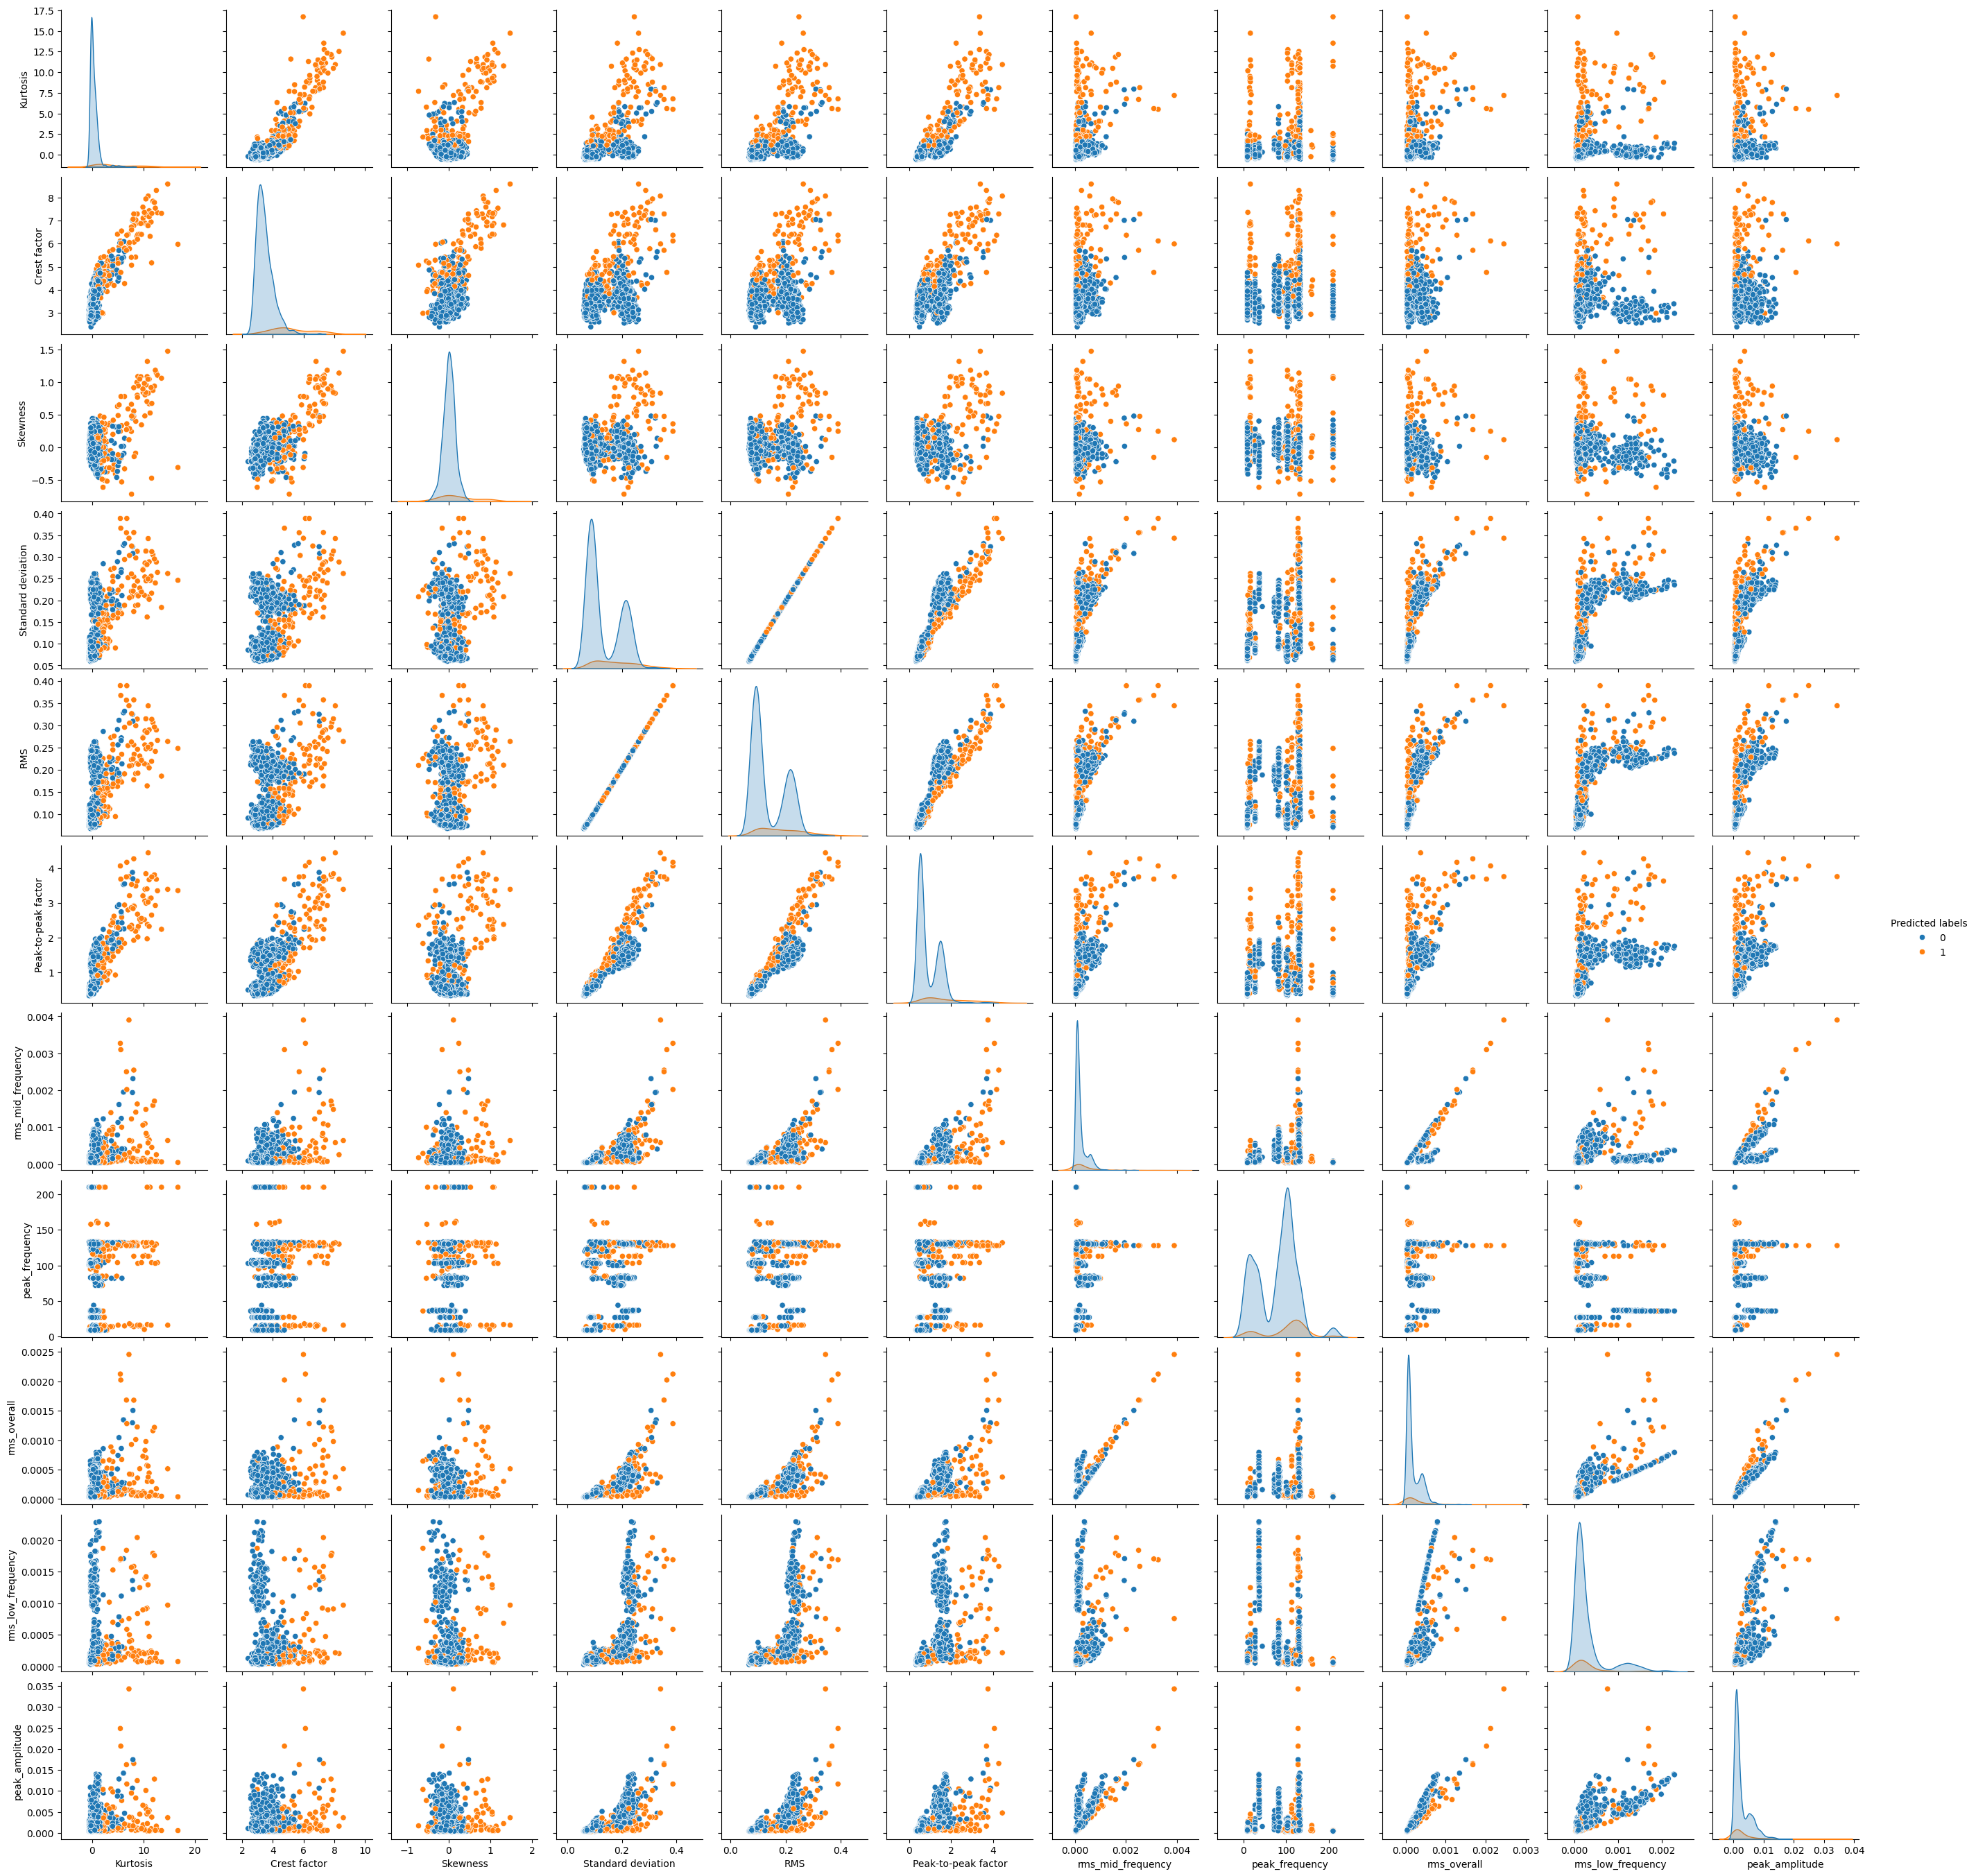

In [28]:
from pyod.utils.data import evaluate_print

print("\nTraining data:")
evaluate_print(MODEL_NAME, y_train, y_train_scores)

print("\nTest data:")
evaluate_print(MODEL_NAME, y_test, y_test_scores)

# Plot test set ground truth
plt.figure(figsize=(6, 5))
x_test['Predicted labels'] = y_test
sns.pairplot(x_test, hue='Predicted labels')
plt.show()
plt.close()

# Plot test set predictions
x_test.drop('Predicted labels', axis=1, inplace=True)

plt.figure(figsize=(6, 5))
x_test['Predicted labels'] = y_test_pred
sns.pairplot(x_test, hue='Predicted labels')
plt.show()
plt.close()